#### 2. What memory and storage option are most popular among customers?

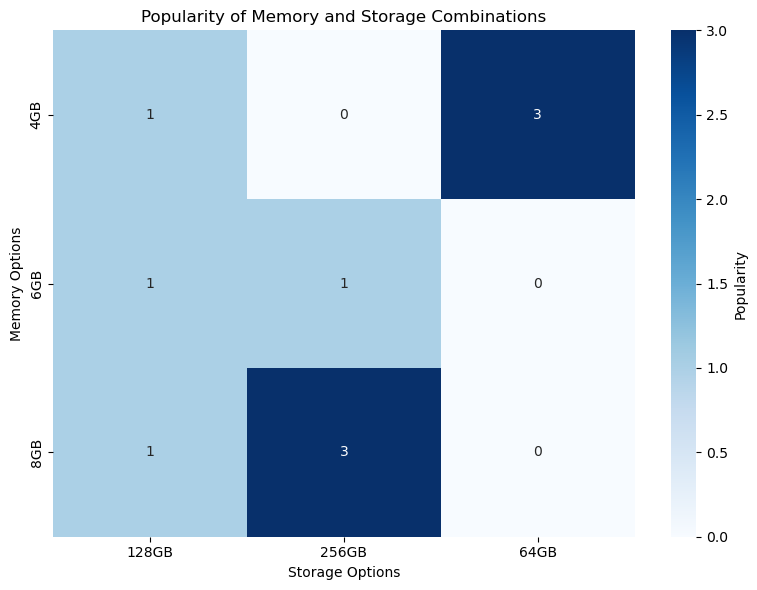

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Memory": ["4GB", "4GB", "6GB", "8GB", "8GB", "4GB", "6GB", "8GB", "4GB", "8GB"],
    "Storage": ["64GB", "128GB", "128GB", "256GB", "128GB", "64GB", "256GB", "256GB", "64GB", "256GB"]
}
df = pd.DataFrame(data)

memory_storage_popularity = df.groupby(['Memory', 'Storage']).size().reset_index(name='Count')

pivot_table = memory_storage_popularity.pivot(index='Memory', columns='Storage', values='Count').fillna(0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Popularity'})
plt.title('Popularity of Memory and Storage Combinations')
plt.xlabel('Storage Options')
plt.ylabel('Memory Options')
plt.tight_layout()
plt.show()

 #### 3. which price range sees the maximum sales volume?

C:\Users\rachi\AppData\Local\Temp\ipykernel_15872\640508432.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = df.groupby('Price Range').size().reset_index(name='Sales Volume')
C:\Users\rachi\AppData\Local\Temp\ipykernel_15872\640508432.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price Range', y='Sales Volume', data=price_range_sales, palette="coolwarm")


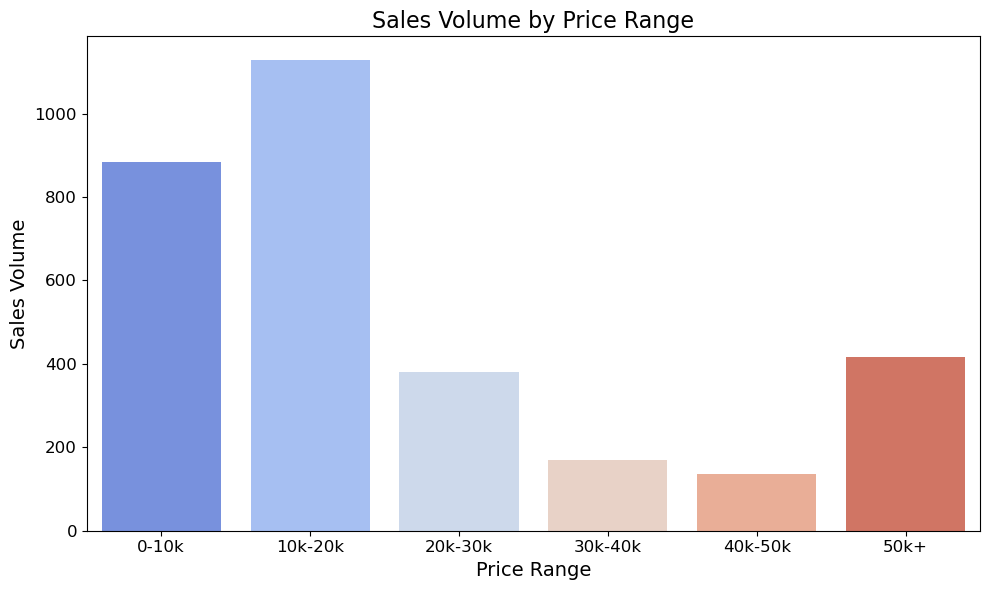

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("df.csv")  # Ensure the file is in the same directory or provide the correct path

df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')

if df['Selling Price'].isnull().any():
    print("Warning: Missing or invalid 'Selling Price' values found. These will be ignored.")
    df = df.dropna(subset=['Selling Price'])

bins = [0, 10000, 20000, 30000, 40000, 50000, df['Selling Price'].max() + 1]  # Add 1 to include max value
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

df['Price Range'] = pd.cut(df['Selling Price'], bins=bins, labels=labels, include_lowest=True)

price_range_sales = df.groupby('Price Range').size().reset_index(name='Sales Volume')

plt.figure(figsize=(10, 6))
sns.barplot(x='Price Range', y='Sales Volume', data=price_range_sales, palette="coolwarm")

plt.title('Sales Volume by Price Range', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Sales Volume', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

#### 4. Which price range sees the maximum sales volume?

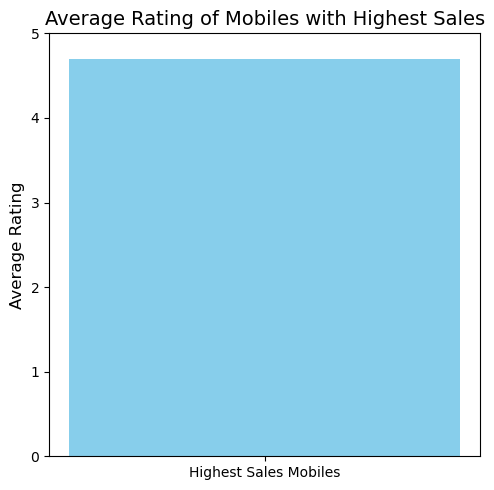

The average rating of mobiles with the highest sales is: 4.70


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("df.csv")  # Ensure the file is in the same directory or provide the correct path

# Ensure relevant columns are numeric
df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with missing or invalid values in Selling Price or Rating
df = df.dropna(subset=['Selling Price', 'Rating'])

# Identify mobiles with the highest sales (highest Selling Price)
highest_sales_value = df['Selling Price'].max()
highest_sales_mobiles = df[df['Selling Price'] == highest_sales_value]

# Calculate the average rating of these mobiles
average_rating = highest_sales_mobiles['Rating'].mean()

# Visualize the result
plt.figure(figsize=(5, 5))
plt.bar(['Highest Sales Mobiles'], [average_rating], color='skyblue')
plt.title('Average Rating of Mobiles with Highest Sales', fontsize=14)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 5)  # Assuming ratings are on a scale of 0 to 5
plt.tight_layout()
plt.show()

# Print the result for verification
print(f"The average rating of mobiles with the highest sales is: {average_rating:.2f}")

#### 5. Which brand offers the highest average discount?

C:\Users\rachi\AppData\Local\Temp\ipykernel_15872\2162258344.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brands', y='Discount', data=average_discount, palette='viridis')


NameError: name 'top_brand' is not defined

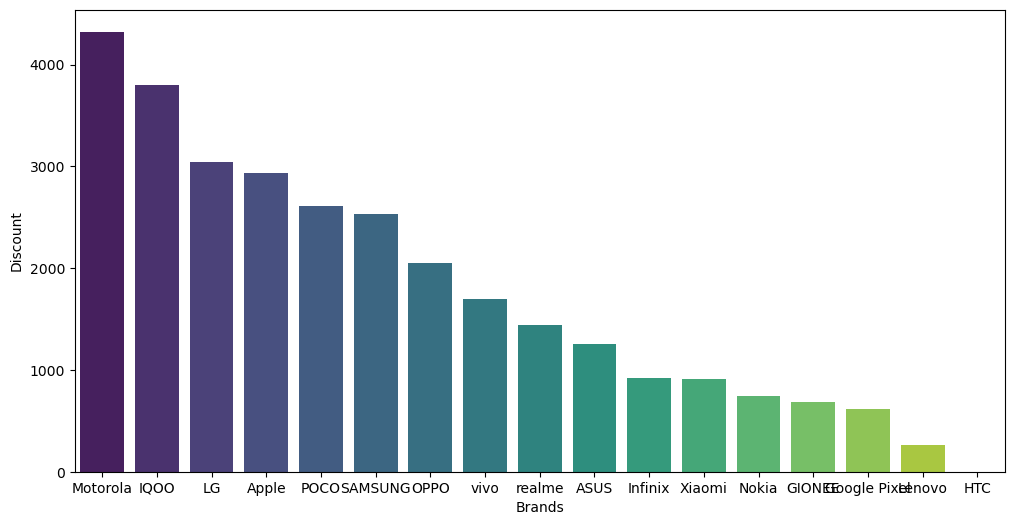

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("df.csv")  # Ensure the file is in the same directory or provide the correct path

# Ensure relevant columns are numeric
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')

# Drop rows with missing or invalid data
df = df.dropna(subset=['Brands', 'Discount'])

# Calculate the average discount for each brand
average_discount = df.groupby('Brands')['Discount'].mean().reset_index()

# Sort the brands by average discount
average_discount = average_discount.sort_values(by='Discount', ascending=False)

# Find the brand with the highest average discount
top_brands = average_discount.iloc[0]['Brands']
top_discount = average_discount.iloc[0]['Discount']

# Plot the average discount by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='Brands', y='Discount', data=average_discount, palette='viridis')

# Highlight the brand with the highest discount
plt.title(f'Average Discount by Brands (Highest: {top_brand})', fontsize=16)
plt.xlabel('Brands', fontsize=14)
plt.ylabel('Average Discount', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for the highest brand
plt.text(0, top_discount + 1, f"{top_brands}: {top_discount:.2f}", ha='center', fontsize=12, color='red')

plt.tight_layout()
plt.show()

# Print the result
print(f"The brands offering the highest average discount is: {top_brands} with an average discount of {top_discount:.2f}.")

#### 6. What are the top three models in terms in revenue?

C:\Users\rachi\AppData\Local\Temp\ipykernel_15872\271877867.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Revenue', y='Models', data=top_models, palette='magma')


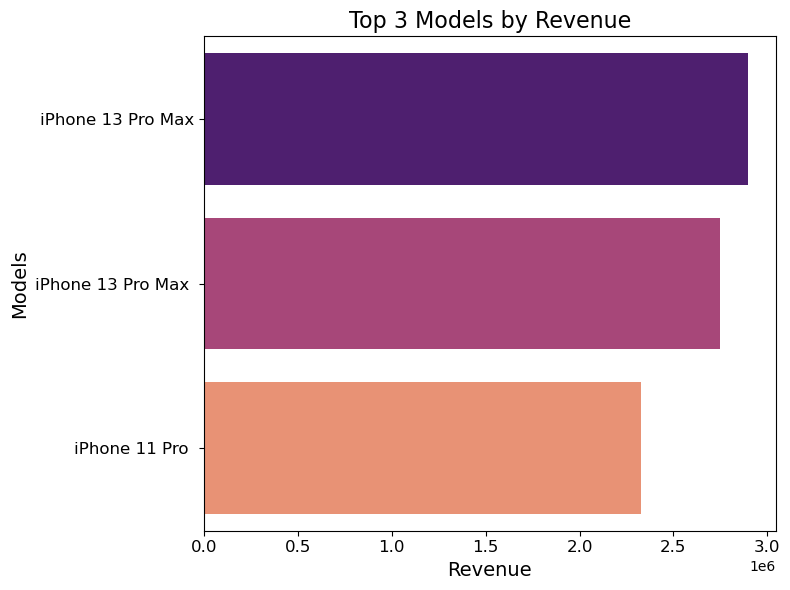

Top 3 Models by Revenue:
                 Models  Revenue
897   iPhone 13 Pro Max  2898100
898  iPhone 13 Pro Max   2748200
887      iPhone 11 Pro   2328492


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("df.csv")  # Ensure the file is in the same directory or provide the correct path

# Ensure relevant columns are numeric
df['Selling Price'] = pd.to_numeric(df['Selling Price'], errors='coerce')

# Drop rows with missing or invalid data
df = df.dropna(subset=['Models', 'Selling Price'])

# Calculate total revenue for each model
model_revenue = df.groupby('Models')['Selling Price'].sum().reset_index(name='Revenue')

# Sort models by revenue and select the top 3
top_models = model_revenue.sort_values(by='Revenue', ascending=False).head(3)

# Plot the top 3 models by revenue
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='Models', data=top_models, palette='magma')

# Add titles and labels
plt.title('Top 3 Models by Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the result for verification
print("Top 3 Models by Revenue:")
print(top_models)

#### 7. What is the average discount percentage across brands?

C:\Users\rachi\AppData\Local\Temp\ipykernel_15872\2456953733.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brands', y='discount percentage', data=avg_discount_per_brands, palette='coolwarm')


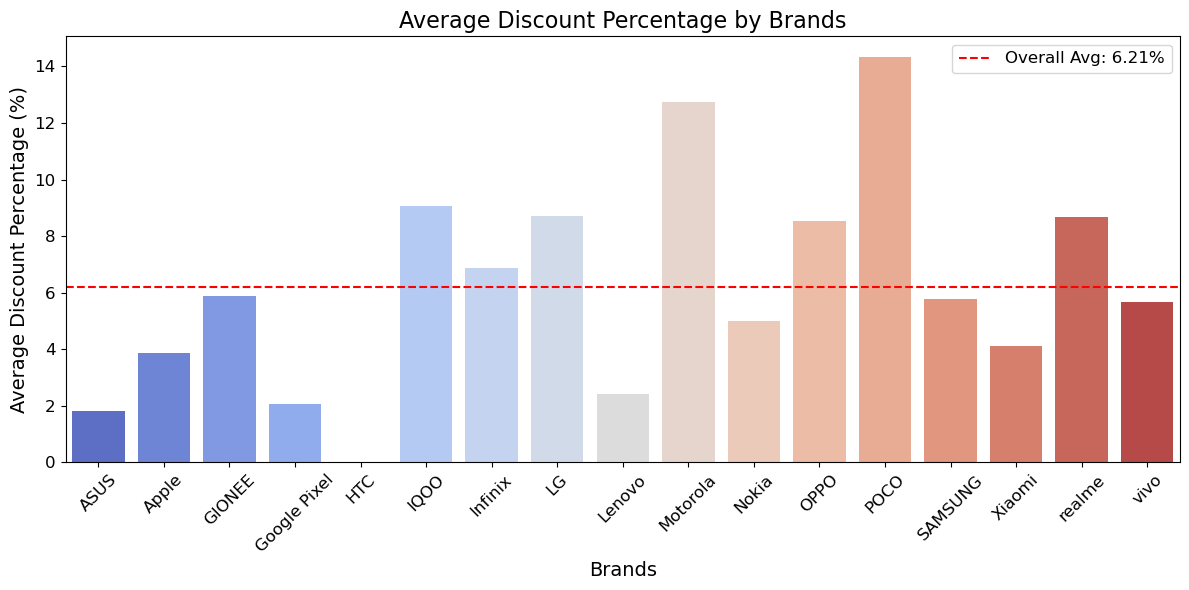

Average Discount Percentage by Brands:
          Brands  discount percentage
0           ASUS             1.802090
1          Apple             3.877825
2         GIONEE             5.901047
3   Google Pixel             2.068506
4            HTC             0.000000
5           IQOO             9.065627
6        Infinix             6.877393
7             LG             8.718038
8         Lenovo             2.414479
9       Motorola            12.750690
10         Nokia             4.985563
11          OPPO             8.520180
12          POCO            14.346840
13       SAMSUNG             5.776880
14        Xiaomi             4.106421
15        realme             8.662233
16          vivo             5.675480

Overall Average Discount Percentage: 6.21%


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("df.csv")  # Ensure the file is in the same directory or provide the correct path

# Ensure relevant columns are numeric
df['discount percentage'] = pd.to_numeric(df['discount percentage'], errors='coerce')

# Drop rows with missing or invalid data
df = df.dropna(subset=['Brands', 'discount percentage'])

# Calculate the average discount percentage for each brand
avg_discount_per_brands = df.groupby('Brands')['discount percentage'].mean().reset_index()

# Calculate the overall average discount percentage
overall_avg_discount = avg_discount_per_brands['discount percentage'].mean()

# Plot the average discount percentage by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='Brands', y='discount percentage', data=avg_discount_per_brands, palette='coolwarm')

# Add titles and labels
plt.title('Average Discount Percentage by Brands', fontsize=16)
plt.xlabel('Brands', fontsize=14)
plt.ylabel('Average Discount Percentage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Highlight the overall average discount with a horizontal line
plt.axhline(overall_avg_discount, color='red', linestyle='--', label=f'Overall Avg: {overall_avg_discount:.2f}%')

# Add legend
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Print the result for verification
print("Average Discount Percentage by Brands:")
print(avg_discount_per_brands)
print(f"\nOverall Average Discount Percentage: {overall_avg_discount:.2f}%")